In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Amazon_Unlocked_Mobile.csv.zip')
df=df.sample(frac=0.25,random_state=10)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [2]:
df.shape

(103460, 6)

In [3]:
#Droping missing values
df.dropna(inplace=True)
#Removing any neutral rating =3
df=df[df['Rating']!=3]
#encode 4 an 5 as 1
#1 and 2 as 0
df['Positively Rated']=np.where(df['Rating']>3,1,0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1


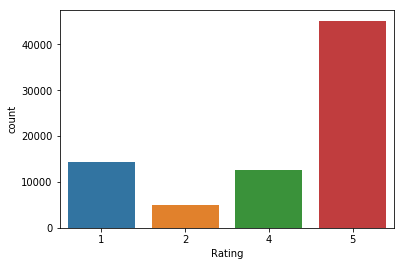

In [4]:
%matplotlib inline
import seaborn as sns
sns.countplot(df['Rating'])

In [5]:
df['Positively Rated'].mean()

0.748474382611857

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positively Rated'], random_state = 0,test_size=0.3)

In [7]:
print('X_train first entry: \n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 exactly as described


X_train shape:  (53912,)


count vectorizer

court vectorizer allows us to use bag of words approch by converting collection of text documents in to a matrix of token counts

First we initiate the count vectorizer and fit it to our training data. Fitting the count vectorizer consists of the tokens of the training data and building of the vocabulary

Fitting the count vectorizer tokenizes each document by finding all sequences of characters that is numbers or letters seperated by word boundaries converts every thing to lower case and builds a vocabulary using these tokens


In [8]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)

In [9]:
vect.get_feature_names()[::2500]

['00',
 'altavoz',
 'buzzing',
 'david',
 'exams',
 'handheld',
 'later3',
 'nisiqueira',
 'pricecons',
 'sank',
 'supposeductive',
 'vendor']

In [10]:
len(vect.get_feature_names())

29077

In [11]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<53912x29077 sparse matrix of type '<class 'numpy.int64'>'
	with 1435347 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\KDR\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9081726365210301


In [14]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())
# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()
# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['worst' 'useless' 'poor' 'junk' 'garbage' 'freezes' 'horrible' 'broken'
 'terrible' 'worthless']

Largest Coefs: 
['excelente' 'excelent' 'excellent' 'love' 'amazing' 'loves' 'awesome'
 'exactly' 'perfectly' 'great']



tfidf(term frequency inverse document frequency(allows us to rescale features)

tfidf allows us to weight terms how imp they are to the document high weight are given to the terms that apper to the document but dont appear often in a corpus features with low tfidf are come in use in all documents


In [15]:
#Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

8502

In [16]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

C:\Users\KDR\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.904293973476715


In [17]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['12mm' 'gripping' '15mm' 'conventions' 'broad' 'fidelity' 'swoop'
 'distort' 'bookmarks' 'amplify']

Largest Tfidf: 
['impressed' 'me' 'go' 'nope' 'especial' 'normal' 'quality' 'solid' 'es'
 'described']



In [18]:
sorted_coef_index = model.coef_[0].argsort()
print('Smallest coef: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest coef: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest coef: 
['not' 'worst' 'poor' 'return' 'disappointed' 'doesn' 'horrible' 'slow'
 'waste' 'terrible']

Largest coef: 
['great' 'love' 'excellent' 'perfect' 'best' 'amazing' 'awesome' 'far'
 'good' 'perfectly']



In [19]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['Not an issue, phone is working', 
                                   'an issue, phone is not working'])))

[0 0]


In [20]:
# n-grams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams,2-grams, 3-grams and 4-grams
vect = CountVectorizer(min_df = 5, ngram_range = (1,4)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

128673

In [21]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

C:\Users\KDR\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.9327758322184145


In [22]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['no good' 'junk' 'worst' 'poor' 'horrible' 'not good' 'broken' 'sucks'
 'terrible' 'garbage']

Largest Coef: 
['not bad' 'excelente' 'excellent' 'excelent' 'perfect' 'awesome' 'great'
 'amazing' 'no problems' 'love']

